## Pasaulinis mėsos suvartojimas

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('meat_consumption_worldwide.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13760 entries, 0 to 13759
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LOCATION  13760 non-null  object 
 1   SUBJECT   13760 non-null  object 
 2   MEASURE   13760 non-null  object 
 3   TIME      13760 non-null  int64  
 4   Value     13760 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 537.6+ KB


In [6]:
data.describe()

,TIME,Value
count,13760.000000,1.376000e+04
mean,2008.175291,1.861701e+03
std,10.600740,9.385656e+03
min,1990.000000,1.669000e-09
25%,1999.000000,3.475390e+00
50%,2008.000000,2.313983e+01
75%,2017.000000,2.967790e+02
max,2026.000000,1.316073e+05


In [7]:
print('Countries:', data["LOCATION"].unique())
print('Type of meat:', data['SUBJECT'].unique())
print('Type of measure:', data['MEASURE'].unique())

Countries: ['AUS' 'CAN' 'JPN' 'KOR' 'MEX' 'NZL' 'TUR' 'USA' 'DZA' 'ARG' 'BGD' 'BRA'
 'CHL' 'CHN' 'COL' 'EGY' 'ETH' 'GHA' 'HTI' 'IND' 'IDN' 'IRN' 'ISR' 'KAZ'
 'MYS' 'MOZ' 'NGA' 'PAK' 'PRY' 'PER' 'PHL' 'RUS' 'SAU' 'ZAF' 'SDN' 'TZA'
 'THA' 'UKR' 'URY' 'VNM' 'ZMB' 'WLD' 'SSA' 'OECD' 'BRICS' 'EU28' 'NOR'
 'CHE']
Type of meat: ['BEEF' 'PIG' 'POULTRY' 'SHEEP']
Type of measure: ['KG_CAP' 'THND_TONNE']


In [8]:
data = data.rename(columns={'LOCATION':'Country','SUBJECT':'Meat','MEASURE':'Measure','TIME':'Year'})

In [9]:
data = data.replace({'BEEF':'Jautiena', 'PIG':'Kiauliena', 'POULTRY':'Paukštiena', 'SHEEP':'Aviena'})

In [10]:
data_index_country = data.set_index('Country')
data_index_country = data_index_country.drop(['BRICS','OECD','SSA'])
data_with_WLD=data_index_country.reset_index()
data_with_WLD_index_country = data_with_WLD.set_index('Country')
data_with_WLD_index_country = data_with_WLD_index_country.drop(['WLD'])

In [11]:
data = data_with_WLD_index_country.reset_index()

In [12]:
Measure_KG_CAP=data.loc[(data['Measure']=='KG_CAP')].sort_values('Value', ascending=False)
Measure_THND_TONNE=data.loc[(data['Measure']=='THND_TONNE')].sort_values('Value', ascending=False)

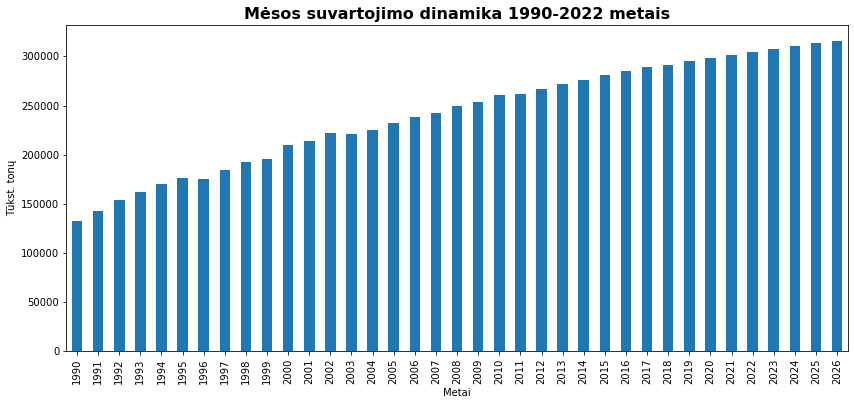

In [13]:
Consumption_THND_TONNE_Year = Measure_THND_TONNE.groupby('Year')['Value'].sum().reset_index().sort_values('Year', ascending=True).plot(x='Year', y='Value', kind = 'bar', figsize=(14,6), legend=False)
plt.title('Mėsos suvartojimo dinamika 1990-2022 metais',fontsize=16,fontweight='bold')
Consumption_THND_TONNE_Year.set(xlabel='Metai', ylabel='Tūkst. tonų')
plt.show()

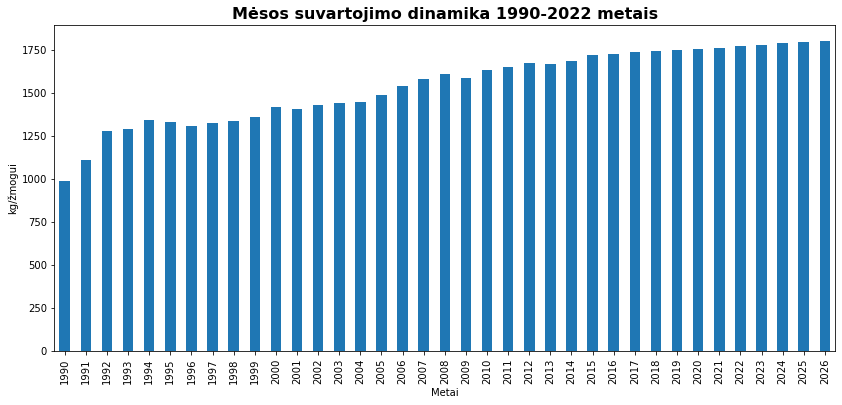

In [14]:
Consumption_KG_CAP_Year = Measure_KG_CAP.groupby('Year')['Value'].sum().reset_index().sort_values('Year', ascending=True).plot(x='Year', y='Value', kind = 'bar', figsize=(14,6), legend=False)
plt.title('Mėsos suvartojimo dinamika 1990-2022 metais',fontsize=16,fontweight='bold')
Consumption_KG_CAP_Year.set(xlabel='Metai', ylabel='kg/žmogui')
plt.show()

In [15]:
Measure_KG_CAP_Year=data.loc[(data['Measure']=='KG_CAP')&(data['Year']<=2022)].sort_values('Value', ascending=False)
Measure_THND_TONNE_Year=data.loc[(data['Measure']=='THND_TONNE')&(data['Year']<=2022)].sort_values('Value', ascending=False)

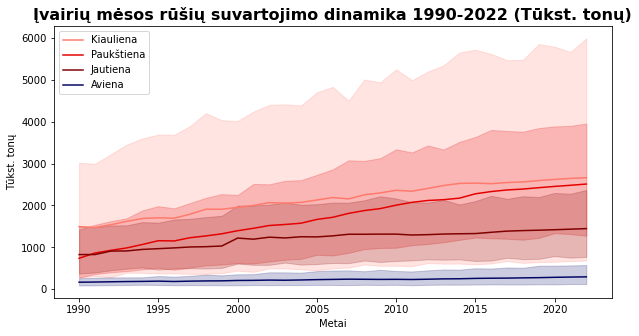

In [16]:
plt.figure(figsize=(10,5))
color_blind_palette = ['#FF796C', '#E50000', '#800000', '#030764']
Consumption_THND_TONNE_Meat=sns.lineplot(data=Measure_THND_TONNE_Year, x=Measure_THND_TONNE_Year['Year'], y=Measure_THND_TONNE_Year['Value'], hue='Meat',palette=color_blind_palette)
plt.legend(loc='upper left')
plt.title('Įvairių mėsos rūšių suvartojimo dinamika 1990-2022 (Tūkst. tonų)',fontsize=16,fontweight='bold')
Consumption_THND_TONNE_Meat.set(xlabel='Metai', ylabel='Tūkst. tonų')
plt.show()

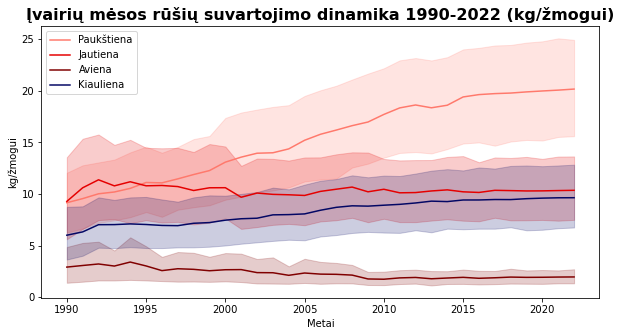

In [17]:
plt.figure(figsize=(10,5))
Consumption_KG_CAP_Meat=sns.lineplot(data=Measure_KG_CAP_Year, x=Measure_KG_CAP_Year['Year'], y=Measure_KG_CAP_Year['Value'], hue='Meat',palette=color_blind_palette)
plt.legend(loc='upper left')
plt.title('Įvairių mėsos rūšių suvartojimo dinamika 1990-2022 (kg/žmogui)',fontsize=16,fontweight='bold')
Consumption_KG_CAP_Meat.set(xlabel='Metai', ylabel='kg/žmogui')
plt.show()

In [18]:
Measure_KG_CAP_2022=data.loc[(data['Measure']=='KG_CAP')&(data['Year']==2022)].sort_values('Value', ascending=False)
Measure_THND_TONNE_2022=data.loc[(data['Measure']=='THND_TONNE')&(data['Year']==2022)].sort_values('Value', ascending=False)

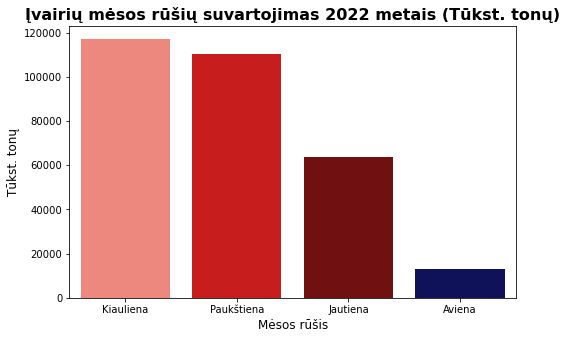

In [19]:
Meat_THND_TONNE_2022=Measure_THND_TONNE_2022.groupby('Meat')['Value'].sum().reset_index().sort_values('Value', ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(data=Meat_THND_TONNE_2022, x='Meat', y='Value', palette=color_blind_palette)
plt.title('Įvairių mėsos rūšių suvartojimas 2022 metais (Tūkst. tonų)',fontsize=16,fontweight='bold')
plt.xlabel('Mėsos rūšis', fontsize=12)
plt.ylabel('Tūkst. tonų',fontsize=12)
plt.show()

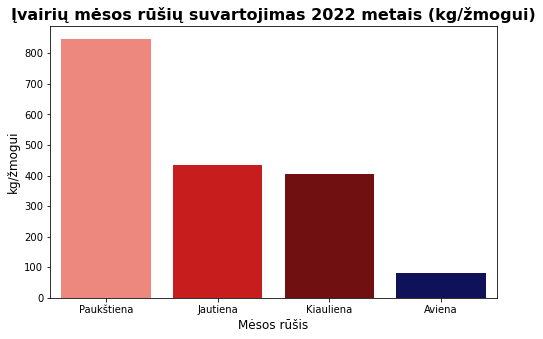

In [20]:
Meat_KG_CAP_2022=Measure_KG_CAP_2022.groupby('Meat')['Value'].sum().reset_index().sort_values('Value', ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(data=Meat_KG_CAP_2022, x='Meat', y='Value', palette=color_blind_palette)
plt.title('Įvairių mėsos rūšių suvartojimas 2022 metais (kg/žmogui)',fontsize=16,fontweight='bold')
plt.xlabel('Mėsos rūšis', fontsize=12)
plt.ylabel('kg/žmogui',fontsize=12)
plt.show()

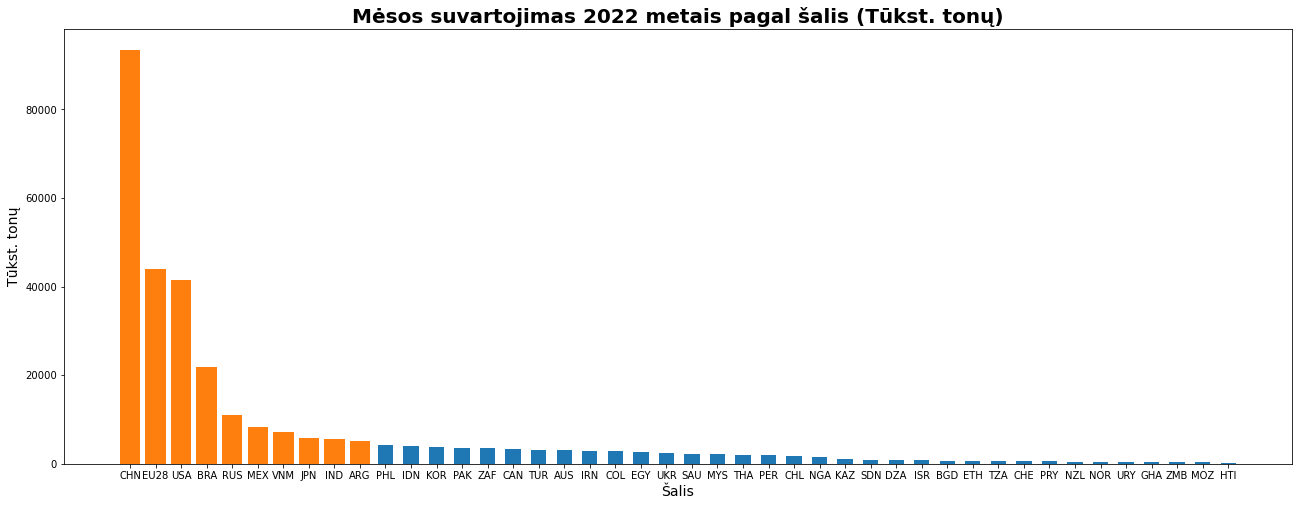

In [21]:
Country_THND_TONNE_2022=Measure_THND_TONNE_2022.groupby('Country')['Value'].sum().reset_index().sort_values('Value', ascending=False)
plt.figure(figsize=(22,8))
plt.bar(Country_THND_TONNE_2022['Country'], Country_THND_TONNE_2022['Value'], data=Country_THND_TONNE_2022, width=0.6)
plt.bar(Country_THND_TONNE_2022[:10]['Country'], Country_THND_TONNE_2022[:10]['Value'])
plt.title('Mėsos suvartojimas 2022 metais pagal šalis (Tūkst. tonų)', fontsize=20,fontweight='bold')
plt.xlabel('Šalis', fontsize=14)
plt.ylabel('Tūkst. tonų',fontsize=14)
plt.show()

In [22]:
print('Šalis, kurioje 2022 metais buvo suvartojama daugiausiai mėsos (tūkst. tonų) yra', Measure_THND_TONNE_2022.groupby('Country')['Value'].sum().idxmax())
print('Šalis, kurioje 2022 metais buvo suvartojama mažiausiai mėsos (tūkst. tonų) yra', Measure_THND_TONNE_2022.groupby('Country')['Value'].sum().idxmin())

Šalis, kurioje 2022 metais buvo suvartojama daugiausiai mėsos (tūkst. tonų) yra CHN
Šalis, kurioje 2022 metais buvo suvartojama mažiausiai mėsos (tūkst. tonų) yra HTI


In [23]:
print('Šalys, kuriose buvo suvartojama daugiausiai mėsos 2022 metais, pagal mėsos rūšį (Tūkst. tonų):')
Measure_THND_TONNE_Beef=Measure_THND_TONNE_2022.loc[(Measure_THND_TONNE_2022['Meat']=='Jautiena')]
print('Daugiausiai jautienos buvo suvartojama',Measure_THND_TONNE_Beef.groupby('Country')['Value'].sum().idxmax())
Measure_THND_TONNE_Poultry = Measure_THND_TONNE_2022.loc[(Measure_THND_TONNE_2022['Meat']=='Paukštiena')]
print('Daugiausiai paukštienos buvo suvartojama', Measure_THND_TONNE_Poultry.groupby('Country')['Value'].sum().idxmax())                         
Measure_THND_TONNE_Pork = Measure_THND_TONNE_2022.loc[(Measure_THND_TONNE_2022['Meat']=='Kiauliena')]
print('Daugiausiai kaulienos buvo suvartojama', Measure_THND_TONNE_Pork.groupby('Country')['Value'].sum().idxmax())    
Measure_THND_TONNE_Lamb = Measure_THND_TONNE_2022.loc[(Measure_THND_TONNE_2022['Meat']=='Aviena')]
print('Daugiausiai avienos buvo suvartojama', Measure_THND_TONNE_Lamb.groupby('Country')['Value'].sum().idxmax())

Šalys, kuriose buvo suvartojama daugiausiai mėsos 2022 metais, pagal mėsos rūšį (Tūkst. tonų):
Daugiausiai jautienos buvo suvartojama USA
Daugiausiai paukštienos buvo suvartojama CHN
Daugiausiai kaulienos buvo suvartojama CHN
Daugiausiai avienos buvo suvartojama CHN


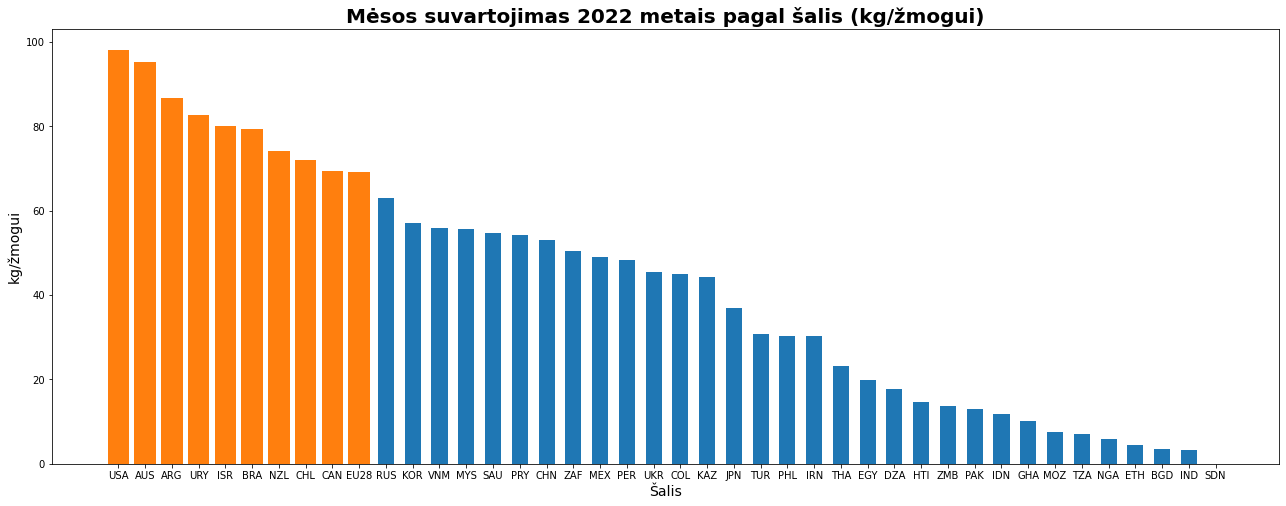

In [24]:
Country_KG_CAP_2022=Measure_KG_CAP_2022.groupby('Country')['Value'].sum().reset_index().sort_values('Value', ascending=False)
plt.figure(figsize=(22,8))
plt.bar(Country_KG_CAP_2022['Country'], Country_KG_CAP_2022['Value'], data=Country_KG_CAP_2022, width=0.6)
plt.bar(Country_KG_CAP_2022[:10]['Country'], Country_KG_CAP_2022[:10]['Value'])
plt.title('Mėsos suvartojimas 2022 metais pagal šalis (kg/žmogui)', fontsize=20,fontweight='bold')
plt.xlabel('Šalis', fontsize=14)
plt.ylabel('kg/žmogui',fontsize=14)
plt.show()

In [25]:
print('Šalis, kurioje 2022 metais daugiausiai kilogramų mėsos teko žmogui yra', Measure_KG_CAP_2022.groupby('Country')['Value'].sum().idxmax())
print('Šalis, kurioje 2022 metais mažiausiai kilogramų mėsos teko žmogui yra', Measure_KG_CAP_2022.groupby('Country')['Value'].sum().idxmin())

Šalis, kurioje 2022 metais daugiausiai kilogramų mėsos teko žmogui yra USA
Šalis, kurioje 2022 metais mažiausiai kilogramų mėsos teko žmogui yra SDN


In [26]:
print('Šalys, kuriose buvo suvartojama daugiausiai mėsos 2022 metais, pagal mėsos rūšį (kg/žmogui):')
Measure_KG_CAP_Beef=Measure_KG_CAP_2022.loc[(Measure_KG_CAP_2022['Meat']=='Jautiena')]
print('Daugiausiai jautienos buvo suvartojama',Measure_KG_CAP_Beef.groupby('Country')['Value'].sum().idxmax())
Measure_KG_CAP_Poultry = Measure_KG_CAP_2022.loc[(Measure_KG_CAP_2022['Meat']=='Paukštiena')]
print('Daugiausiai paukštienos buvo suvartojama', Measure_KG_CAP_Poultry.groupby('Country')['Value'].sum().idxmax())                         
Measure_KG_CAP_Pork = Measure_KG_CAP_2022.loc[(Measure_KG_CAP_2022['Meat']=='Kiauliena')]
print('Daugiausiai kiaulienos buvo suvartojama', Measure_KG_CAP_Pork.groupby('Country')['Value'].sum().idxmax())    
Measure_KG_CAP_Lamb = Measure_KG_CAP_2022.loc[(Measure_KG_CAP_2022['Meat']=='Aviena')]
print('Daugiausiai avienos buvo suvartojama', Measure_KG_CAP_Lamb.groupby('Country')['Value'].sum().idxmax())    

Šalys, kuriose buvo suvartojama daugiausiai mėsos 2022 metais, pagal mėsos rūšį (kg/žmogui):
Daugiausiai jautienos buvo suvartojama URY
Daugiausiai paukštienos buvo suvartojama ISR
Daugiausiai kiaulienos buvo suvartojama CHN
Daugiausiai avienos buvo suvartojama AUS


In [27]:
China=Measure_THND_TONNE_Year.loc[Measure_THND_TONNE_Year['Country']=='CHN']
China=China.groupby(['Year']).sum()
USA=Measure_THND_TONNE_Year.loc[Measure_THND_TONNE_Year['Country']=='USA']
USA=USA.groupby(['Year']).sum()
EU28=Measure_THND_TONNE_Year.loc[Measure_THND_TONNE_Year['Country']=='EU28']
EU28=EU28.groupby(['Year']).sum()
BRA=Measure_THND_TONNE_Year.loc[Measure_THND_TONNE_Year['Country']=='BRA']
BRA=BRA.groupby(['Year']).sum()

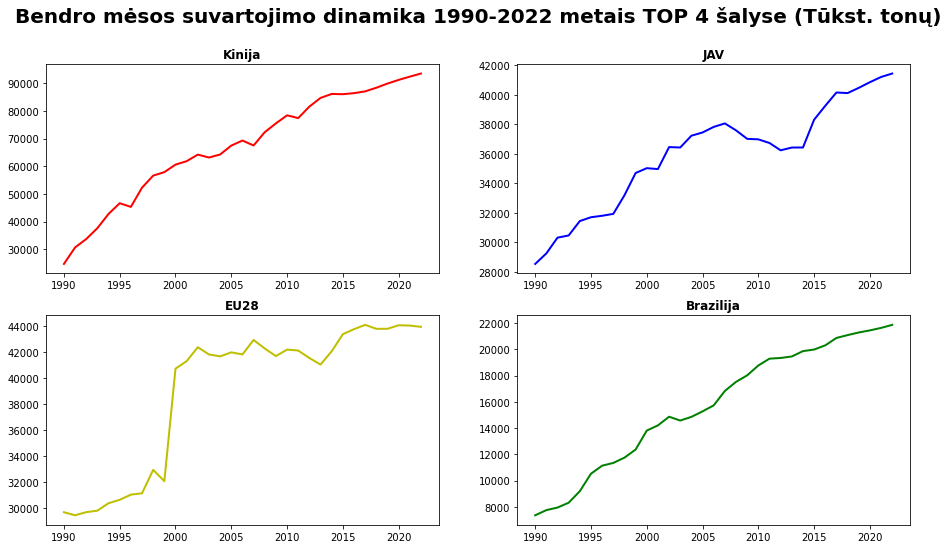

In [28]:
fig=plt.figure(num=1, figsize=(15,8))
fig.suptitle('Bendro mėsos suvartojimo dinamika 1990-2022 metais TOP 4 šalyse (Tūkst. tonų)',y=1,fontsize=20,fontweight='bold')

plt.subplot(2, 2, 1)
plt.plot(China, 'r', linewidth=2)
plt.title('Kinija',fontweight='bold')

plt.subplot(2, 2, 2)
plt.plot(USA, color='b', linewidth=2)
plt.title('JAV',fontweight='bold')

plt.subplot(2, 2, 3)
plt.plot(EU28, 'y', linewidth=2)
plt.title('EU28',fontweight='bold')

plt.subplot(2, 2, 4)
plt.plot(BRA, 'g', linewidth=2)
plt.title('Brazilija',fontweight='bold')

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom= 0.1, wspace= 0.2, hspace=0.2)
fig.add_subplot(1,1,1, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)
plt.show()

In [29]:
China_THND_TONNE=Measure_THND_TONNE_Year.loc[Measure_THND_TONNE['Country']=='CHN']
USA_THND_TONNE=Measure_THND_TONNE_Year.loc[Measure_THND_TONNE['Country']=='USA']
EU28_THND_TONNE=Measure_THND_TONNE_Year.loc[Measure_THND_TONNE['Country']=='EU28']
BRA_THND_TONNE=Measure_THND_TONNE_Year.loc[Measure_THND_TONNE['Country']=='BRA']

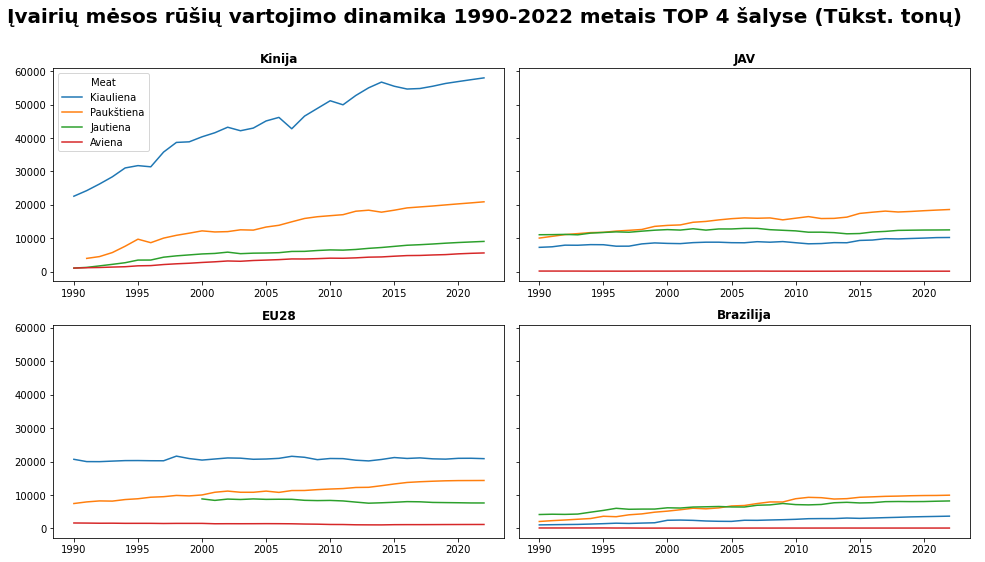

In [30]:
fig, axes = plt.subplots(2, 2, figsize=(14, 8), sharey=True)
fig.suptitle('Įvairių mėsos rūšių vartojimo dinamika 1990-2022 metais TOP 4 šalyse (Tūkst. tonų)',y=1,fontsize=20,fontweight='bold')

sns.lineplot(ax=axes[0,0], data=China_THND_TONNE, x='Year', y='Value', hue='Meat')
axes[0,0].set_title('Kinija', fontweight='bold')
axes[0,0].set(xlabel=None, ylabel=None)

sns.lineplot(ax=axes[0,1], data=USA_THND_TONNE, x='Year', y='Value',hue='Meat',hue_order=['Kiauliena','Paukštiena','Jautiena','Aviena'], legend=None)
axes[0,1].set_title('JAV', fontweight='bold')
axes[0,1].set(xlabel=None, ylabel=None)

sns.lineplot(ax=axes[1,0], data=EU28_THND_TONNE, x='Year', y='Value',hue='Meat',legend=None)
axes[1,0].set_title('EU28', fontweight='bold')
axes[1,0].set(xlabel=None, ylabel=None)

sns.lineplot(ax=axes[1,1], data=BRA_THND_TONNE, x='Year', y='Value',hue='Meat',hue_order=['Kiauliena','Paukštiena','Jautiena','Aviena'], legend=None)
axes[1,1].set_title('Brazilija', fontweight='bold')
axes[1,1].set(xlabel=None, ylabel=None)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom= 0.1, wspace= 0.3, hspace=0.2)
fig.add_subplot(1,1,1, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)
plt.tight_layout()

In [31]:
Top_4_countries=Measure_THND_TONNE_2022.loc[(Measure_THND_TONNE_2022['Country']=='CHN')|(Measure_THND_TONNE_2022['Country']=='USA')|(Measure_THND_TONNE_2022['Country']=='EU28')|(Measure_THND_TONNE_2022['Country']=='BRA')]

TOP_4_THND_TONNE_Poultry=Top_4_countries.loc[(Top_4_countries['Meat']=='Paukštiena')]
TOP_4_THND_TONNE_Poultry=TOP_4_THND_TONNE_Poultry.groupby('Country')['Value'].sum().reset_index().sort_values('Value', ascending=False)
TOP_4_THND_TONNE_Beef=Top_4_countries.loc[(Top_4_countries['Meat']=='Jautiena')]
TOP_4_THND_TONNE_Beef=TOP_4_THND_TONNE_Beef.groupby('Country')['Value'].sum().reset_index().sort_values('Value', ascending=False)
TOP_4_THND_TONNE_Pork=Top_4_countries.loc[(Top_4_countries['Meat']=='Kiauliena')]
TOP_4_THND_TONNE_Pork=TOP_4_THND_TONNE_Pork.groupby('Country')['Value'].sum().reset_index().sort_values('Value', ascending=False)
TOP_4_THND_TONNE_Lamb=Top_4_countries.loc[(Top_4_countries['Meat']=='Aviena')]
TOP_4_THND_TONNE_Lamb=TOP_4_THND_TONNE_Lamb.groupby('Country')['Value'].sum().reset_index().sort_values('Value', ascending=False)

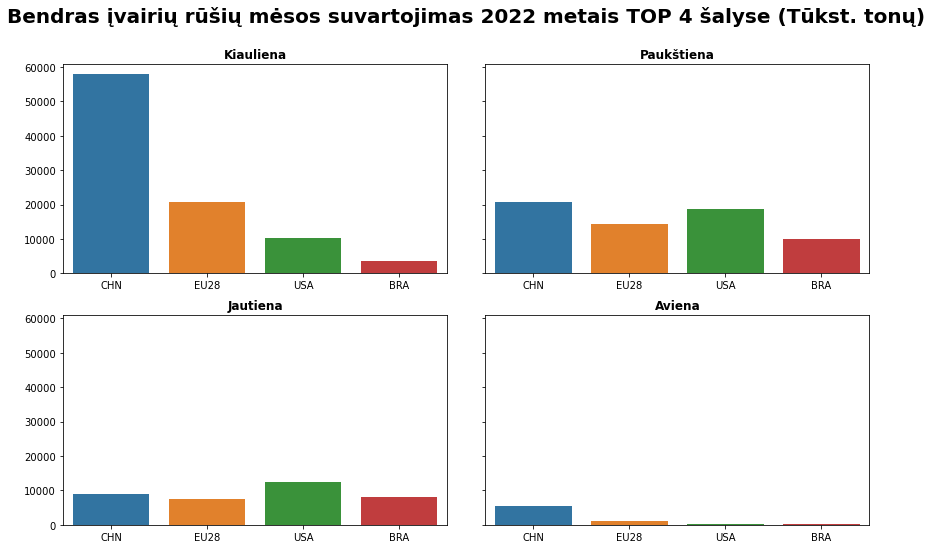

In [32]:
fig, axes = plt.subplots(2, 2, figsize=(14, 8), sharey=True)
fig.suptitle('Bendras įvairių rūšių mėsos suvartojimas 2022 metais TOP 4 šalyse (Tūkst. tonų)',y=1,fontsize=20,fontweight='bold')

sns.barplot(ax=axes[0,1], data=TOP_4_THND_TONNE_Poultry, x='Country', y='Value',  order=['CHN','EU28','USA','BRA'])
axes[0,1].set_title('Paukštiena', fontweight='bold')
axes[0,1].set(xlabel=None, ylabel=None)

sns.barplot(ax=axes[1,0], data=TOP_4_THND_TONNE_Beef, x='Country', y='Value', order=['CHN','EU28','USA','BRA'])
axes[1,0].set_title('Jautiena', fontweight='bold')
axes[1,0].set(xlabel=None, ylabel=None)

sns.barplot(ax=axes[0,0], data=TOP_4_THND_TONNE_Pork, x='Country', y='Value')
axes[0,0].set_title('Kiauliena', fontweight='bold')
axes[0,0].set(xlabel=None, ylabel=None)

sns.barplot(ax=axes[1,1], data=TOP_4_THND_TONNE_Lamb, x='Country', y='Value')
axes[1,1].set_title('Aviena', fontweight='bold')
axes[1,1].set(xlabel=None, ylabel=None)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom= 0.1, wspace= 0.1, hspace=0.2)
fig.add_subplot(1,1,1, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)
plt.show()

In [33]:
USA=Measure_KG_CAP_Year.loc[Measure_KG_CAP_Year['Country']=='USA']
USA=USA.groupby(['Year']).sum()

AUS=Measure_KG_CAP_Year.loc[Measure_KG_CAP_Year['Country']=='AUS']
AUS=AUS.groupby(['Year']).sum()

ARG=Measure_KG_CAP_Year.loc[Measure_KG_CAP_Year['Country']=='ARG']
ARG=ARG.groupby(['Year']).sum()

URY=Measure_KG_CAP_Year.loc[Measure_KG_CAP_Year['Country']=='URY']
URY=URY.groupby(['Year']).sum()

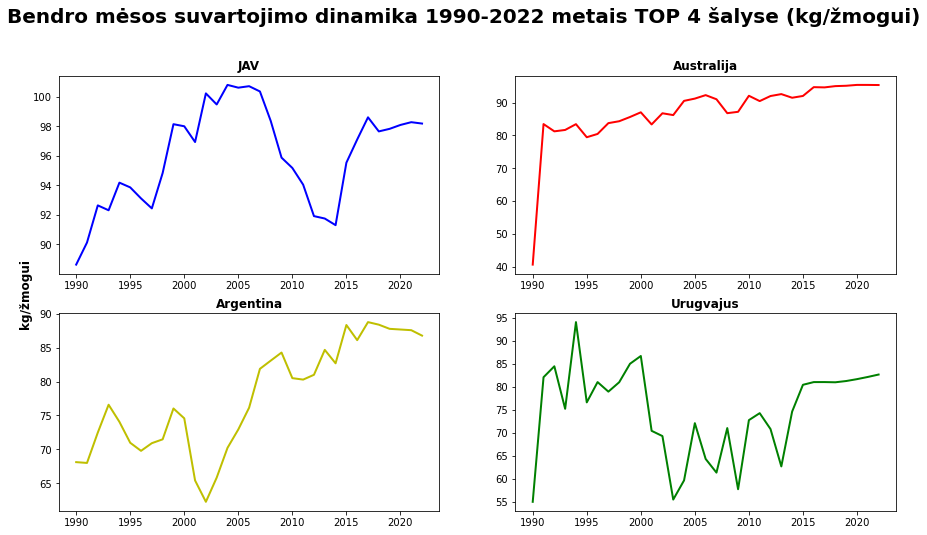

In [34]:
fig=plt.figure(num=1, figsize=(15,8))
fig.suptitle('Bendro mėsos suvartojimo dinamika 1990-2022 metais TOP 4 šalyse (kg/žmogui)',y=1,fontsize=20,fontweight='bold')

plt.subplot(2, 2, 1)
plt.plot(USA, color='b',linewidth=2)
plt.title('JAV',fontweight='bold')

plt.subplot(2, 2, 2)
plt.plot(AUS, 'r', linewidth=2)
plt.title('Australija',fontweight='bold')

plt.subplot(2, 2, 3)
plt.plot(ARG, 'y', linewidth=2)
plt.title('Argentina',fontweight='bold')

plt.subplot(2, 2, 4)
plt.plot(URY, 'g', linewidth=2)
plt.title('Urugvajus',fontweight='bold')

fig.add_subplot(1,1,1, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)
plt.ylabel('kg/žmogui',fontsize=12,fontweight='bold')

plt.show()

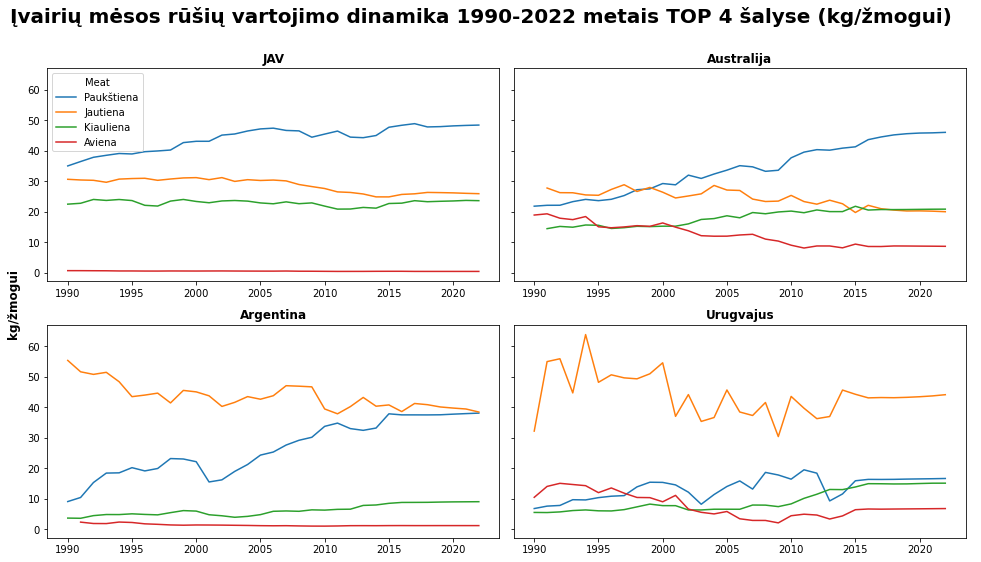

In [35]:
USA_KG_CAP=Measure_KG_CAP_Year.loc[Measure_KG_CAP['Country']=='USA']
AUS_KG_CAP=Measure_KG_CAP_Year.loc[Measure_KG_CAP['Country']=='AUS']
ARG_KG_CAP=Measure_KG_CAP_Year.loc[Measure_KG_CAP['Country']=='ARG']
URY_KG_CAP=Measure_KG_CAP_Year.loc[Measure_KG_CAP['Country']=='URY']

fig, axes = plt.subplots(2, 2, figsize=(14, 8), sharey=True)
fig.suptitle('Įvairių mėsos rūšių vartojimo dinamika 1990-2022 metais TOP 4 šalyse (kg/žmogui)',y=1,fontsize=20,fontweight='bold')

sns.lineplot(ax=axes[0,0], data=USA_KG_CAP, x='Year', y='Value', hue='Meat')
axes[0,0].set_title('JAV', fontweight='bold')
axes[0,0].set(xlabel=None, ylabel=None)

sns.lineplot(ax=axes[0,1], data=AUS_KG_CAP, x='Year', y='Value',hue='Meat', legend=None)
axes[0,1].set_title('Australija', fontweight='bold')
axes[0,1].set(xlabel=None, ylabel=None)

sns.lineplot(ax=axes[1,0], data=ARG_KG_CAP, x='Year', y='Value',hue='Meat',hue_order=['Paukštiena','Jautiena','Kiauliena','Aviena'], legend=None)
axes[1,0].set_title('Argentina', fontweight='bold')
axes[1,0].set(xlabel=None, ylabel=None)

sns.lineplot(ax=axes[1,1], data=URY_KG_CAP, x='Year', y='Value',hue='Meat',hue_order=['Paukštiena','Jautiena','Kiauliena','Aviena'], legend=None)
axes[1,1].set_title('Urugvajus', fontweight='bold')
axes[1,1].set(xlabel=None, ylabel=None)

fig.add_subplot(1,1,1, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)
plt.ylabel('kg/žmogui',fontsize=12,fontweight='bold')
plt.tight_layout()

In [36]:
Top_4_countries=Measure_KG_CAP_2022.loc[(Measure_KG_CAP_2022['Country']=='AUS')|(Measure_KG_CAP_2022['Country']=='USA')|(Measure_KG_CAP_2022['Country']=='ARG')|(Measure_KG_CAP_2022['Country']=='URY')]

TOP_4_KG_CAP_Poultry=Top_4_countries.loc[(Top_4_countries['Meat']=='Paukštiena')]
TOP_4_KG_CAP_Poultry=TOP_4_KG_CAP_Poultry.groupby('Country')['Value'].sum().reset_index().sort_values('Value', ascending=False)

TOP_4_KG_CAP_Beef=Top_4_countries.loc[(Top_4_countries['Meat']=='Jautiena')]
TOP_4_KG_CAP_Beef=TOP_4_KG_CAP_Beef.groupby('Country')['Value'].sum().reset_index().sort_values('Value', ascending=False)

TOP_4_KG_CAP_Pork=Top_4_countries.loc[(Top_4_countries['Meat']=='Kiauliena')]
TOP_4_KG_CAP_Pork=TOP_4_KG_CAP_Pork.groupby('Country')['Value'].sum().reset_index().sort_values('Value', ascending=False)

TOP_4_KG_CAP_Lamb=Top_4_countries.loc[(Top_4_countries['Meat']=='Aviena')]
TOP_4_KG_CAP_Lamb=TOP_4_KG_CAP_Lamb.groupby('Country')['Value'].sum().reset_index().sort_values('Value', ascending=False)

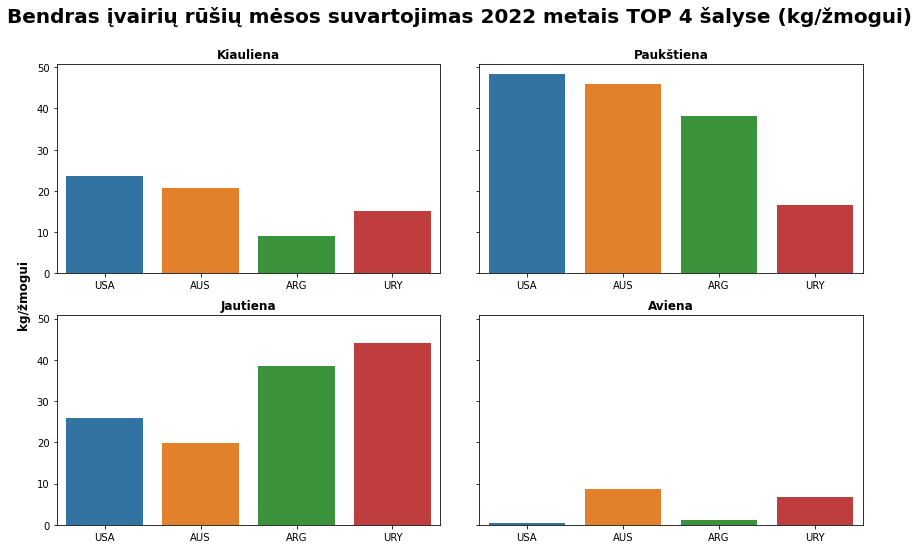

In [37]:
fig, axes = plt.subplots(2, 2, figsize=(14, 8), sharey=True)
fig.suptitle('Bendras įvairių rūšių mėsos suvartojimas 2022 metais TOP 4 šalyse (kg/žmogui)',y=1,fontsize=20,fontweight='bold')

sns.barplot(ax=axes[0,1], data=TOP_4_KG_CAP_Poultry, x='Country', y='Value')
axes[0,1].set_title('Paukštiena', fontweight='bold')
axes[0,1].set(xlabel=None, ylabel=None)

sns.barplot(ax=axes[1,0], data=TOP_4_KG_CAP_Beef, x='Country', y='Value',order=['USA','AUS','ARG','URY'])
axes[1,0].set_title('Jautiena', fontweight='bold')
axes[1,0].set(xlabel=None, ylabel=None)

sns.barplot(ax=axes[0,0], data=TOP_4_KG_CAP_Pork, x='Country', y='Value',order=['USA','AUS','ARG','URY'])
axes[0,0].set_title('Kiauliena', fontweight='bold')
axes[0,0].set(xlabel=None, ylabel=None)

sns.barplot(ax=axes[1,1], data=TOP_4_KG_CAP_Lamb, x='Country', y='Value',order=['USA','AUS','ARG','URY'])
axes[1,1].set_title('Aviena', fontweight='bold')
axes[1,1].set(xlabel=None, ylabel=None)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom= 0.1, wspace= 0.1, hspace=0.2)
fig.add_subplot(1,1,1, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)
plt.ylabel('kg/žmogui',fontsize=12,fontweight='bold')
plt.show()